In [34]:
import os
from PIL import Image
import random
from random import randint
import torch
import torchvision.transforms as transforms

In [36]:
transform = {    
    "image_normed": transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    "mask": transforms.Lambda(lambda x: 
        torch.nn.functional.interpolate(x.float(), scale_factor=2, 
                                        mode='nearest').squeeze(0)),
    "image_raw": transforms.ToTensor(),
}

class MaskedDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, mask_dir, transform=transform):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        images =  set([x.replace('.png', '') for x 
                       in os.listdir(img_dir) if x.endswith('.png')])
        masks = set([x.replace('.pt', '') for x 
                     in os.listdir(mask_dir) if x.endswith('.pt')])        
        self.entries = list(images & masks)
        if len(self.entries) < len(images):
            print('Missing masks', images - masks)        
        
    def __len__(self):
        return len(self.entries)
    
    def __getitem__(self, idx):
        entry_path = self.entries[idx]
        img = Image.open(os.path.join(self.img_dir, entry_path + '.png'))
        mask =  torch.load(os.path.join(self.mask_dir, entry_path + '.pt'))
        
        img_normed  = self.transform['image_normed'](img)
        img_raw =  self.transform['image_raw'](img)                
        mask_2x = self.transform['mask'](mask)
        
        res_normed =  img_normed * mask_2x
        res_raw =  img_raw * mask_2x
        return {'res_raw': res_raw, 'res_normed': res_normed}

img_dir ='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024'
mask_dir = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks'

ds = MaskedDataset(img_dir, mask_dir)    
ds[0]

{'res_raw': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'res_normed': tensor([[[-0., -0., -0.,  ..., 0., 0., 0.],
          [-0., -0., -0.,  ..., 0., 0., 0.],
          [-0., -0., -0.,  ..., 0., 0., 0.],
          ...,
          [0., 

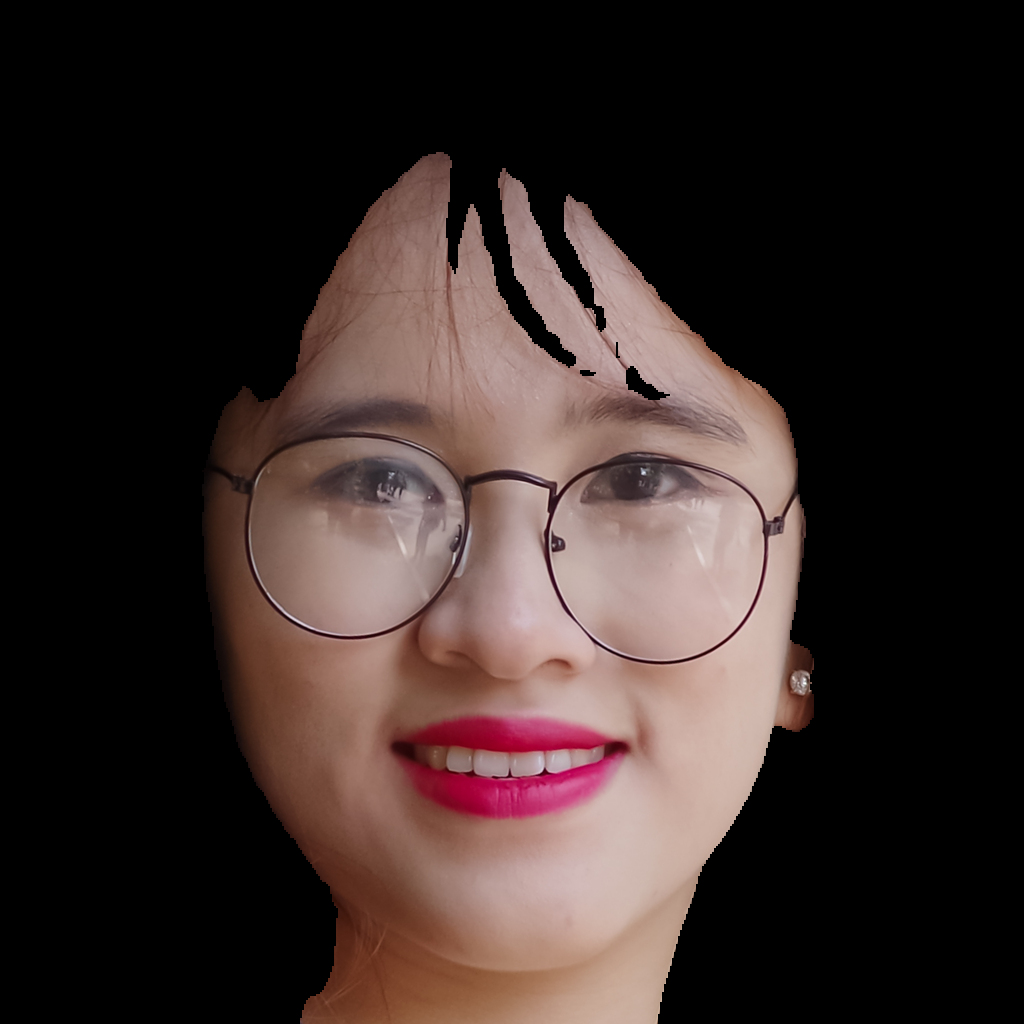

In [38]:
transforms.ToPILImage()(ds[1]['res_raw'])#.convert("RGB")

In [11]:
img_dir ='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024'
mask_dir = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks'

data = images & masks
len(data), data

(7603,
 {'24453',
  '26170',
  '27799',
  '64930',
  '28566',
  '58428',
  '02055',
  '66129',
  '38014',
  '54869',
  '17548',
  '34484',
  '11889',
  '48019',
  '30259',
  '51583',
  '42145',
  '22409',
  '08890',
  '35505',
  '56445',
  '18782',
  '40994',
  '56400',
  '68441',
  '32633',
  '13922',
  '48700',
  '10280',
  '61128',
  '65130',
  '39094',
  '52225',
  '67398',
  '51233',
  '00448',
  '19701',
  '27321',
  '24019',
  '10337',
  '43208',
  '34098',
  '58341',
  '33159',
  '36839',
  '12576',
  '51681',
  '06077',
  '52146',
  '49221',
  '61405',
  '16392',
  '62978',
  '32106',
  '09508',
  '49869',
  '19153',
  '14198',
  '18949',
  '18281',
  '27746',
  '01110',
  '35380',
  '03895',
  '39373',
  '43088',
  '15730',
  '56951',
  '64914',
  '26052',
  '05077',
  '15599',
  '31968',
  '53223',
  '38643',
  '14870',
  '61607',
  '18341',
  '15968',
  '08821',
  '17490',
  '27449',
  '10007',
  '57700',
  '56850',
  '27090',
  '57290',
  '17349',
  '45472',
  '49840',
  '

In [14]:
mask = torch.load("./res/masks/00003.pt")
mask.shape

torch.Size([1, 1, 512, 512])

In [15]:
torch.nn.functional.upsample_nearest(mask.float(), 
                                     scale_factor=2).shape

/home/bobi/.local/lib/python3.8/site-packages/torch/nn/functional.py:3208: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 1, 1024, 1024])

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [25]:
mask_2x = transforms.Lambda(lambda x: 
  torch.nn.functional.interpolate(x.float(), scale_factor=2, mode='nearest').squeeze(0))(mask)
mask_2x.shape

torch.Size([1, 1024, 1024])

In [32]:
list({1, 2,3})

[1, 2, 3]